In [1]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
!pip install ultralytics
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [3]:
import os
import shutil

os.makedirs("/root/.kaggle", exist_ok=True)
!mv /content/kaggle.json /root/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d pkdarabi/cardetection

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/cardetection
License(s): Attribution 4.0 International (CC BY 4.0)


In [5]:
!unzip /content/cardetection.zip -d /content/Traffic_Sign_Data

Streaming output truncated to the last 5000 lines.
  inflating: /content/Traffic_Sign_Data/car/train/labels/00000_00003_00024_png.rf.08957035e670072dbb22d8f9905e9b84.txt  
  inflating: /content/Traffic_Sign_Data/car/train/labels/00000_00003_00025_png.rf.11e558fae394d310693ee9223b8962ca.txt  
  inflating: /content/Traffic_Sign_Data/car/train/labels/00000_00003_00026_png.rf.1f6b33373353f896f2c2025ffd264e51.txt  
  inflating: /content/Traffic_Sign_Data/car/train/labels/00000_00003_00026_png.rf.a3b6c2dcd4ee9a8064667b7bb266590b.txt  
  inflating: /content/Traffic_Sign_Data/car/train/labels/00000_00003_00027_png.rf.c1381ed46ee0d7e21877ea3d7ef86127.txt  
  inflating: /content/Traffic_Sign_Data/car/train/labels/00000_00003_00029_png.rf.8e24d2606537779612888c6a06c7043d.txt  
  inflating: /content/Traffic_Sign_Data/car/train/labels/00000_00004_00000_png.rf.45dccdbf08ed12f25d7742d8bf88c102.txt  
  inflating: /content/Traffic_Sign_Data/car/train/labels/00000_00004_00001_png.rf.557d3494b3e633e29069

In [6]:
import os

# List the files inside the extracted dataset folder
print(os.listdir("/content/Traffic_Sign_Data"))

['car', 'video.mp4']


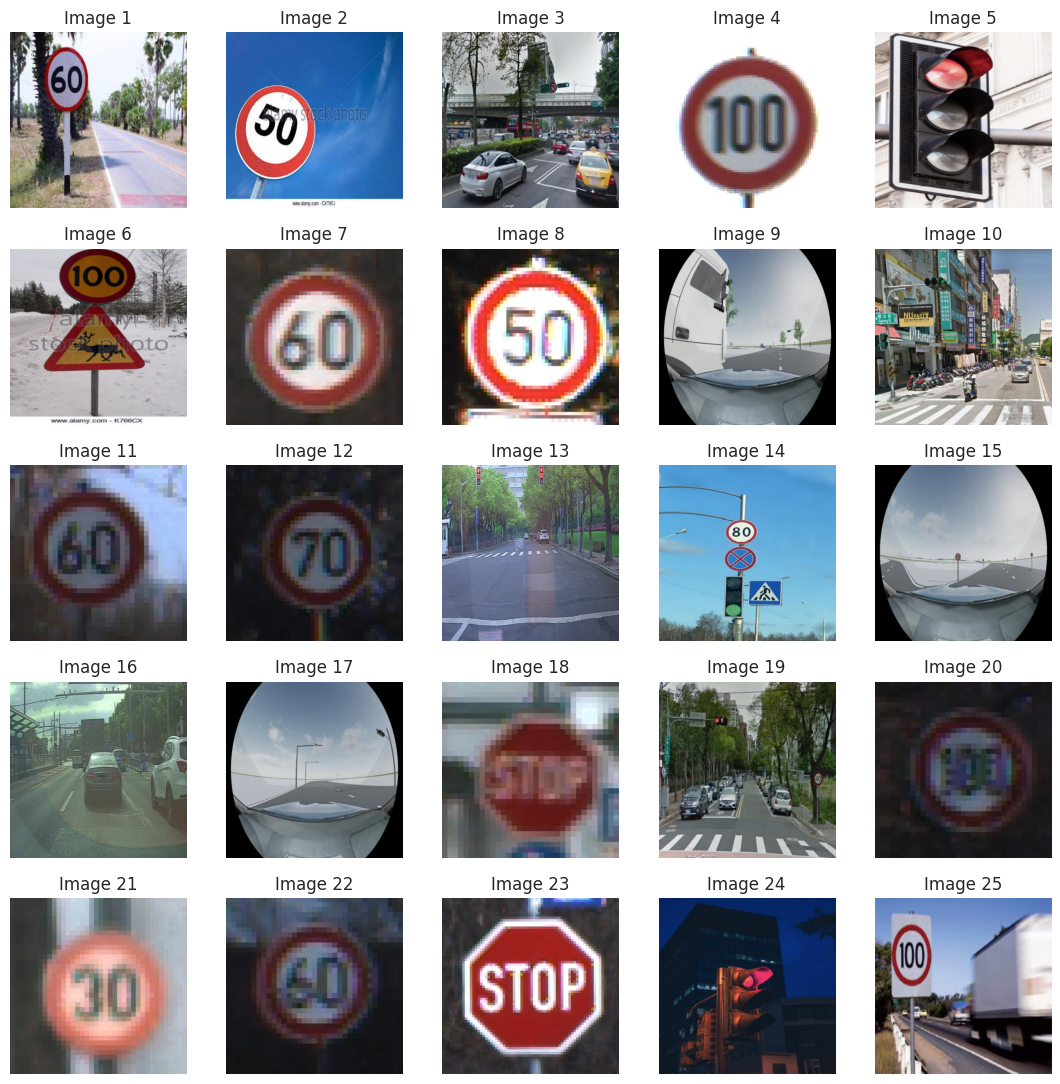

In [7]:
Image_dir = '/content/Traffic_Sign_Data/car/train/images'

num_samples = 25
image_files = os.listdir(Image_dir)

rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(5, 5, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 5, i % 5]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
img = cv2.imread("/content/Traffic_Sign_Data/car/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
print(img.shape)

(416, 416, 3)


In [8]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 MB 11.7 MB/s eta 0:00:00


In [ ]:
model = YOLO("yolov8n.pt")
r = model.train(data="/content/Traffic_Sign_Data/car/data.yaml",epochs=30,device="cuda",batch=-1,optimizer="auto")

100%|██████████| 6.25M/6.25M [00:00<00:00, 98.1MB/s]


Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Traffic_Sign_Data/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 17.1MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.8MB/s]


AMP: checks passed ✅


train: Scanning /content/Traffic_Sign_Data/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:01<00:00, 2496.47it/s]


train: New cache created: /content/Traffic_Sign_Data/car/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.10G reserved, 0.08G allocated, 14.56G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.377         33.74         216.9        (1, 3, 640, 640)                    list
     3013773       16.42         0.524         21.68         77.72        (2, 3, 640, 640)                    list
     3013773       32.84         0.851         22.97         74.92        (4, 3, 640, 640)                    list
     3013773       65.67         1.411         30.28         85.34        

train: Scanning /content/Traffic_Sign_Data/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Traffic_Sign_Data/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 1314.39it/s]

val: New cache created: /content/Traffic_Sign_Data/car/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0008515625), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30        13G     0.9216      3.988      1.256        101        640: 100%|██████████| 33/33 [01:09<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.41s/it]

                   all        801        944     0.0414      0.723      0.118     0.0994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      12.4G     0.7242       2.81      1.094        106        640: 100%|██████████| 33/33 [01:02<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.40s/it]


                   all        801        944      0.487      0.228      0.232      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      12.4G     0.7267      2.329      1.071         82        640: 100%|██████████| 33/33 [01:02<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]

                   all        801        944      0.395      0.454      0.411      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      12.4G     0.7177      2.027      1.058        104        640: 100%|██████████| 33/33 [01:08<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.72s/it]

                   all        801        944      0.427      0.554      0.504      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      12.5G     0.6861      1.744      1.045        101        640: 100%|██████████| 33/33 [01:08<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.24s/it]

                   all        801        944      0.681      0.646       0.71      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      12.5G     0.6535      1.524       1.03        106        640: 100%|██████████| 33/33 [01:06<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.33s/it]

                   all        801        944      0.761      0.735      0.803       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      12.5G     0.6404      1.374      1.019        104        640: 100%|██████████| 33/33 [01:05<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.51s/it]

                   all        801        944      0.831      0.716      0.816      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      12.5G     0.6342      1.271      1.012         94        640: 100%|██████████| 33/33 [01:01<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.50s/it]

                   all        801        944      0.814      0.716      0.809       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      12.5G      0.627      1.175      1.012         95        640: 100%|██████████| 33/33 [01:04<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.98s/it]

                   all        801        944      0.883      0.741      0.855      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      12.5G      0.616       1.11      1.004        104        640: 100%|██████████| 33/33 [01:07<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.43s/it]

                   all        801        944      0.846      0.752      0.839      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      12.6G     0.6081      1.059     0.9942         80        640: 100%|██████████| 33/33 [01:08<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.36s/it]

                   all        801        944      0.882      0.792      0.884      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      12.6G     0.5893     0.9852       0.99        114        640: 100%|██████████| 33/33 [01:03<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.76s/it]

                   all        801        944      0.882      0.798       0.89      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      12.6G     0.5856     0.9296     0.9876        108        640: 100%|██████████| 33/33 [01:04<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.62s/it]

                   all        801        944      0.934      0.825      0.909      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      12.6G     0.5867     0.9101      0.985         94        640: 100%|██████████| 33/33 [01:05<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.91s/it]

                   all        801        944      0.921      0.825       0.91      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      12.6G     0.5871     0.8869     0.9834        102        640: 100%|██████████| 33/33 [01:04<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.14s/it]


                   all        801        944      0.942      0.821      0.921      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      12.7G       0.57     0.8461     0.9766        110        640: 100%|██████████| 33/33 [01:04<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.86s/it]

                   all        801        944      0.925      0.827       0.92      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      12.7G     0.5683      0.808     0.9766         95        640: 100%|██████████| 33/33 [00:58<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.50s/it]

                   all        801        944      0.948      0.837      0.933      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      12.7G     0.5624     0.7935     0.9739         90        640: 100%|██████████| 33/33 [01:05<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.19s/it]

                   all        801        944      0.927      0.853      0.936      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      12.7G     0.5568     0.7798     0.9699         95        640: 100%|██████████| 33/33 [01:03<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.92s/it]


                   all        801        944      0.899      0.847      0.916      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      12.7G     0.5465       0.73     0.9676         95        640: 100%|██████████| 33/33 [01:06<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.64s/it]

                   all        801        944      0.943      0.857      0.936      0.806


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      12.7G     0.5537     0.6319     0.9364         53        640: 100%|██████████| 33/33 [01:00<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.69s/it]

                   all        801        944      0.929      0.859      0.938      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      12.8G     0.5378     0.5683     0.9299         55        640: 100%|██████████| 33/33 [00:48<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.36s/it]

                   all        801        944      0.956      0.852       0.94      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      12.8G     0.5337     0.5473     0.9309         45        640: 100%|██████████| 33/33 [00:49<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.42s/it]

                   all        801        944      0.941      0.856      0.935      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      12.8G     0.5215     0.5164     0.9263         49        640: 100%|██████████| 33/33 [00:49<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.21s/it]

                   all        801        944      0.933      0.875      0.947      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      12.8G     0.5156      0.497     0.9319         54        640: 100%|██████████| 33/33 [00:49<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.54s/it]

                   all        801        944      0.951      0.877      0.949       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      12.8G      0.508     0.4781     0.9158         51        640: 100%|██████████| 33/33 [00:49<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.38s/it]

                   all        801        944       0.96      0.881      0.955      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      12.8G     0.5071      0.465     0.9166         52        640: 100%|██████████| 33/33 [00:51<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.28s/it]

                   all        801        944      0.929      0.901      0.955      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      12.9G     0.5007     0.4523      0.912         51        640: 100%|██████████| 33/33 [00:49<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.51s/it]

                   all        801        944      0.959       0.88      0.957      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      12.9G     0.4893     0.4494     0.9047         55        640: 100%|██████████| 33/33 [00:50<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.59s/it]

                   all        801        944       0.94      0.884      0.955      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      12.9G     0.4889     0.4399     0.9057         53        640: 100%|██████████| 33/33 [00:49<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.36s/it]

                   all        801        944      0.904      0.917      0.956      0.826



30 epochs completed in 0.614 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:06<00:06,  3.29s/it]

In [ ]:
rm = pd.read_csv("/content/runs/detect/train/results.csv")
rm.columns = rm.columns.str.strip()


In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))


sns.lineplot(x='epoch', y='train/box_loss', data=rm, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=rm, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=rm, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=rm, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=rm, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=rm, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=rm, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=rm, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=rm, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=rm, ax=axs[4,1])


axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:
r_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = r_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

In [ ]:
def normalize_image(image):
    return image / 255.0
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)


dataset_path = '/content/Traffic_Sign_Data/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]


if len(image_files) > 0:

    num_images = len(image_files)
    step_size = max(1, num_images // 9)
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            image = cv2.imread(image_path)

            if image is not None:
                resized_image = resize_image(image, size=(640, 640))
                normalized_image = normalize_image(resized_image)
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                results = r_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
!pip install pytube

In [ ]:
from pytube import YouTube


url = "https://www.youtube.com/watch?v=0UKjRdI2FQs"
yt = YouTube(url)
video_stream = yt.streams.filter(only_video=True, file_extension="mp4").order_by("resolution").desc().first()

video_stream.download(filename="v1.mp4")
print("Download complete: v1.mp4")


In [ ]:
r_model.predict(source="/content/Traffic_Sign_Data/video.mp4", show=True,save = True)

In [ ]:
r_model.predict(source="/content/v1.mp4", show=True,save = True)